In [1]:
import os
from __future__ import print_function

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.rcParams['figure.figsize'] = [5.0, 5.0]
# plt.rcParams['figure.dpi'] = 240

from subproblem_solvers import *
from logsumexp_coordinate_methods import *

import math
import scipy
from collections import defaultdict

from sklearn.datasets import load_svmlight_file
from functions import *
from algorithms import *
from loss_functions import *




# from scipy.special import expit
# from scipy.special import logsumexp, softmax


from sys import platform as sys_pf
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")

In [90]:
def plot_results(results, xparam, labels, 
                title, xlabel,figurename):
    plt.figure(figsize=(5, 5))
    
    linewidth = 2.5
    alpha = 1
    markeredgewidth=1.5
    markeredgecolor=[0,0,0,0.6]
    markevery= int(len(results[0][0]['grad'])/6)+1
    markers = ["<","s","p","D","X","v","P","^","o",">"]

#     colors = [[0.138, 0.484, 0.782],[0.969, 0.553, 0.769],[0.498, 0.745, 0.392],[0.93, 0.525, 0.219]]
    colors = sns.color_palette("colorblind")
    
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15)

        
    for i,result in enumerate((results[0])):
        
        grad_mean = np.mean([results[j][i]['grad'] for j in range(rep)],axis=0)
        grad_std = np.std([results[j][i]['grad'] for j in range(rep)],axis=0)
            
        if xparam is not None:
            plt.semilogy(result[xparam], 
                         grad_mean, 
                         label=labels[i],
                         color=colors[i],
                         marker=markers[i],
                         markevery=markevery,
                         linewidth=linewidth,
                         alpha=alpha,
                         markeredgewidth=markeredgewidth,
                         markeredgecolor=markeredgecolor
                        )
            plt.fill_between(result[xparam], grad_mean-grad_std, grad_mean+grad_std, 
                             color=colors[i], alpha=0.5)  
        else: 
            plt.semilogy(grad_mean, 
                         label=labels[i],
                         color=colors[i],
                         marker = markers[i],
                         markevery=markevery,
                         linewidth=linewidth,
                         alpha=alpha,
                         markeredgewidth=markeredgewidth,
                         markeredgecolor=markeredgecolor
                        )
            plt.fill_between(np.arange(0,len(grad_mean)), grad_mean-grad_std, grad_mean+grad_std, 
                             color=colors[i], alpha=0.3)
    
    if xparam is None:

        plt.semilogy(np.arange(1,len(grad_mean)),8*np.array(result['grad'])[0]*np.arange(1,len(grad_mean))**(-2/3), 'b--', \
             label = r'$\mathcal{O}(k^{-2/3})$')
    
    
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(r'$||\nabla f||$', fontsize=18)
    plt.title(title, fontsize=18)
    plt.legend(fontsize=16,loc=(1,0))
    plt.tick_params(labelsize=14)
    
    if xparam is None:
        figure_name = 'plots/' + 'convergence_in_iterations_' + figurename + '.pdf' 
    else:
        figure_name = 'plots/' + 'convergence_in_' + xparam + '_' + figurename +'.pdf'
        
#     plt.savefig(figure_name, bbox_inches='tight')

#     plt.tight_layout()


In [91]:
# def coordinate_cubic_newton_new(solver, loss, grad, hess_vec, hessian, X, Y, w_0, 
#                                 tolerance, tau=1,
#                             max_iter=10000, H_0=1.0, line_search=True, 
#                             trace=True, schedule='constant',scale_lin=1.0, scale_quad=1.0, c=1.0, exp=0.05):
    
#     global weights
    
# #     np.random.seed(seed)
#     history = defaultdict(list) if trace else None
#     start_timestamp = datetime.now()
#     w_k = np.copy(w_0)
#     H_k = H_0
#     n = w_k.shape[0]
#     num_coord = 0 # total number of evaluated coordinates
    
#     lambda_k = 0
#     eta_1 = 0.1 # opt.get('success_treshold',0.1)
#     eta_2 = 0.9 # opt.get('very_success_treshold',0.9)
#     gamma_1 = 1.5 # opt.get('penalty_increase_multiplier',2.)
#     gamma_2 = 2. # opt.get('penalty_derease_multiplier',2.)
    

#     func_k = loss(w_k,X,Y)
#     func_S_k = np.copy(func_k)
    
    

#     # The whole gradient can be computed as:
#     grad_k = grad(w_k, X, Y, np.arange(n))
#     # The Hessian is:

#     accepted_steps = 0
#     for k in range(max_iter + 1):

#         if np.linalg.norm(grad_k) <= tolerance:
#             status = 'success'
#             break

#         if k == max_iter:
#             status = 'iterations_exceeded'
#             break

#         # Choose randomly a subset of coordinates.
#         if schedule == 'constant':
#             tau_schedule = tau
#         elif schedule == 'linear':
#             tau_schedule = min(int(np.floor(tau+scale_lin*k)),len(w_0))
#         elif schedule == 'quadratic':
#             tau_schedule = min(int(np.floor(tau+scale_quad*k**2)),len(w_0))
#         elif schedule == 'exponential':
#             tau_schedule = min(int(np.floor(tau+c*np.exp(exp*k))),len(w_0))
#         else:
#             print('Unknown schedule type. Using constant coordiante schedule.')
#             tau_schedule = tau
                    
#         num_coord += tau_schedule
        
#         grad_k = grad(w_k, X, Y, np.arange(n)) # calculate full gradient to check convergence 
            
#         S = np.random.choice(n, tau_schedule, replace=False)
#         X_S = X[:, S]
        
#         grad_k_S = grad(w_k, X, Y, S)
        
        
        
#         hess_v = lambda v: hess_vec(w_k, X, Y, S, v)
#         hess = lambda w: hessian(w, X, Y, S)
#         hess_k_S = hessian(w_k, X, Y, S)
        
# #         print(w_k[S].shape, X_S.shape, Y.shape)
# #         print(hess_k_S)
#         (h,lambda_k) = solve_ARC_subproblem(solver,
#                                             grad_k_S, hess_v, hess_k_S,
#                                             H_k, w_k[S],
#                                             successful_flag=False,lambda_k=lambda_k,
#                                             exact_tol=1e-10,krylov_tol=1e-1,solve_each_i_th_krylov_space=1, 
#                                             keep_Q_matrix_in_memory=True)
    
        
        
#         if trace:
#             history['grad_S'].append(np.linalg.norm(grad_k_S))
#             history['grad'].append(np.linalg.norm(grad_k))
#             history['func_full'].append(func_k)
#             history['func_S'].append(func_S_k)
#             history['time'].append(
#                 (datetime.now() - start_timestamp).total_seconds())
#             history['num_coord'].append(num_coord)
#             history['H'].append(H_k)

# #         print('h: ', h)
# #         print('lambda_k', lambda_k)
        
#         tmp_w_k = w_k.copy()
#         tmp_w_k[S] += h
        
#         func_T = loss(tmp_w_k,X,Y)
#         func_S_T = loss(tmp_w_k[S],X_S,Y)

#         #### III: Regularization Update #####

#         function_decrease = func_k - func_T
#         hn = np.linalg.norm(h)
        
#         print('||h||: ', hn)
        
#         model_decrease= -(np.dot(grad_k_S, h) + 0.5 * np.dot(h, hess_v(h))+ 1/3*H_k*hn**3)
        
#         print('model decr.: ', model_decrease)
#         print('func decr. : ', function_decrease)

# #         if np.isinf(function_decrease):
            
# #             weights = tmp_w_k
# #             break
        
#         rho = function_decrease / model_decrease
#         assert (model_decrease >=0), 'negative model decrease. This should not have happened'


#         print('func_T: ', func_T)
# #         print('len(w_k): ', len(w_k))
# #         print('len(h): ', len(h))
#         print('norm(grd_k): ', np.linalg.norm(grad_k))
#         print('norm(grad_k_S): ', np.linalg.norm(grad_k_S))
# #         print('norm(w_k): ', np.linalg.norm(tmp_w_k))
# #         print('rho: ', rho)
#         print('H_k: ', H_k)
        
        
#         # Update w if step s is successful
#         if rho >= eta_1:
#             accepted_steps += 1
            
#             # Update the current point.
#             w_k[S] += h
#             func_k = func_T
#             func_S_k = func_S_T
#             successful_flag=True
#         else:
#             print('cubic step failed')
#             tmp_w_k = w_k.copy()
#             tmp_w_k[S] -= 0.5 * grad_k_S
#             func_T = loss(tmp_w_k,X,Y)
#             if func_T < func_k:
#                 print('gradient step successful')
#                 func_k = func_T 
#                 w_k = tmp_w_k
#             else:
#                 print('func_k - func_T', func_k - func_T)
#                 print('norm(grd_k): ', np.linalg.norm(grad_k))
#                 print('norm(tmp_w_k - w_k):', np.linalg.norm(tmp_w_k - w_k))
#                 func_k = func_k
# #         print('acc_step:', accepted_steps)

# #         n_samples_seen += n_samples_per_step

#         #Update penalty parameter
#         if rho >= eta_2:
#             H_k=max(H_k/gamma_2,1e-10)
#             #alternative (Cartis et al. 2011): sigma= max(min(grad_norm,sigma),np.nextafter(0,1)) 
        
#         elif rho < eta_1:
#             H_k = gamma_1*H_k
#             successful_flag=False   
# #             print ('unscuccesful iteration')



# #         if k % 100 == 0:
# #             print('iteration: ', k)
            

            

#     return w_k, status, history

In [115]:
def coordinate_cubic_newton_new(solver, loss, grad, hess_vec, hessian, X, Y, w_0, 
                                tolerance, tau=1,
                            max_iter=10000, H_0=1.0, line_search=True, 
                            trace=True, schedule='constant',scale_lin=1.0, scale_quad=1.0, c=1.0, exp=0.05, eps_1=1e-2, eps_2=1e-2):
    
    global weights
    
#     np.random.seed(seed)
    history = defaultdict(list) if trace else None
    start_timestamp = datetime.now()
    w_k = np.copy(w_0)
    H_k = H_0
    n = w_k.shape[0]
    num_coord = 0 # total number of evaluated coordinates
    
    lambda_k = 0
    eta_1 = 0.01 # opt.get('success_treshold',0.1)
    eta_2 = 0.9 # opt.get('very_success_treshold',0.9)
    gamma_1 = 1.5 # opt.get('penalty_increase_multiplier',2.)
    gamma_2 = 2. # opt.get('penalty_derease_multiplier',2.)
    

    func_k = loss(w_k,X,Y)
    func_S_k = np.copy(func_k)
    
    

    # The whole gradient can be computed as:
    grad_k = grad(w_k, X, Y, np.arange(n))
    if schedule == 'adaptive':
        hessian_F = np.linalg.norm(hessian(w_k, X, Y, np.arange(n)),2)

    accepted_steps = 0
    for k in range(max_iter + 1):

        if np.linalg.norm(grad_k) <= tolerance:
            status = 'success'
            break

        if k == max_iter:
            status = 'iterations_exceeded'
            break

        # Choose randomly a subset of coordinates.
        if schedule == 'constant':
            tau_schedule = tau
        elif schedule == 'linear':
            tau_schedule = min(int(np.floor(tau+scale_lin*k)),len(w_0))
        elif schedule == 'quadratic':
            tau_schedule = min(int(np.floor(tau+scale_quad*k**2)),len(w_0))
        elif schedule == 'exponential':
            tau_schedule = min(int(np.floor(tau+c*np.exp(exp*k))),len(w_0))
        elif schedule == 'adaptive':
            print('term_1: ', 1-(eps_1**2/(np.linalg.norm(grad_k,2)**2)))
            print('term_2: ',np.sqrt(1 - eps_2/(hessian_F**2)))
            tau_schedule = min(int(len(w_0)*max(1-eps_1**2/(np.linalg.norm(grad_k,2)**2), 
                                            np.sqrt(1 - eps_2/(hessian_F**2)))),
                               len(w_0))
            print('tau(S_%d) = %d' %(k, tau_schedule))
        else:
            print('Unknown schedule type. Using constant coordinate schedule.')
            tau_schedule = tau
                    
        num_coord += tau_schedule
        
        grad_k = grad(w_k, X, Y, np.arange(n)) # calculate full gradient to check convergence 
        
        if schedule == 'adaptive':
            hessian_F = np.linalg.norm(hessian(w_k, X, Y, np.arange(n)),2)# calculate the Frobenius norm for the adaptive schedule
            
        S = np.random.choice(n, tau_schedule, replace=False)
        X_S = X[:, S]
        
        grad_k_S = grad(w_k, X, Y, S)
        
        
        
        hess_v = lambda v: hess_vec(w_k, X, Y, S, v)
        hess = lambda w: hessian(w, X, Y, S)
        hess_k_S = hessian(w_k, X, Y, S)
        
#         print(w_k[S].shape, X_S.shape, Y.shape)
#         print(hess_k_S)
        (h,lambda_k) = solve_ARC_subproblem(solver,
                                            grad_k_S, hess_v, hess_k_S,
                                            H_k, w_k[S],
                                            successful_flag=False,lambda_k=lambda_k,
                                            exact_tol=1e-10,krylov_tol=1e-1,solve_each_i_th_krylov_space=1, 
                                            keep_Q_matrix_in_memory=True)
    
        
        
        if trace:
            history['grad_S'].append(np.linalg.norm(grad_k_S))
            history['grad'].append(np.linalg.norm(grad_k))
            history['func_full'].append(func_k)
            history['func_S'].append(func_S_k)
            history['time'].append(
                (datetime.now() - start_timestamp).total_seconds())
            history['num_coord'].append(num_coord)
            history['H'].append(H_k)

#         print('h: ', h)
#         print('lambda_k', lambda_k)
        
        tmp_w_k = w_k.copy()
        tmp_w_k[S] += h
        
        func_T = loss(tmp_w_k,X,Y)
        func_S_T = loss(tmp_w_k[S],X_S,Y)

        #### III: Regularization Update #####
        
        w_S = np.zeros(w_k.shape)
        w_S[S] = tmp_w_k[S]
        w_S_before = w_S.copy()
        w_S_before[S] -= h
        
       
        function_decrease = loss(w_S_before,X,Y) - loss(w_S,X,Y)
        
        hn = np.linalg.norm(h)
        
#         print('hn: ', hn)
        
        model_decrease= -(np.dot(grad_k_S, h) + 0.5 * np.dot(h, hess_v(h))+ 1/3*H_k*hn**3)
        
        print('model decr.: ', model_decrease)
        print('func decr. : ', function_decrease)

#         if np.isinf(function_decrease):
            
#             weights = tmp_w_k
#             break
        
        rho = function_decrease / model_decrease
        assert (model_decrease >=0), 'negative model decrease. This should not have happened'


#         print('func_T: ', func_T)
# #         print('len(w_k): ', len(w_k))
# #         print('len(h): ', len(h))
        print('norm(grd_k): ', np.linalg.norm(grad_k))
        print('norm(grad_k_S): ', np.linalg.norm(grad_k_S))
#         print('norm(w_k): ', np.linalg.norm(tmp_w_k))
        print('rho: ', rho)
#         print('H_k: ', H_k)
        
        
        # Update w if step s is successful
        if rho >= eta_1:
            accepted_steps += 1
            
            # Update the current point.
            w_k[S] += h
            func_k = func_T
            func_S_k = func_S_T
            successful_flag=True
        else:
            func_k=func_k  
#         print('acc_step:', accepted_steps)

#         n_samples_seen += n_samples_per_step

        #Update penalty parameter
        if rho >= eta_2:
            H_k=max(H_k/gamma_2,1e-10)
            #alternative (Cartis et al. 2011): sigma= max(min(grad_norm,sigma),np.nextafter(0,1)) 
        
        elif rho < eta_1:
            H_k = min(gamma_1*H_k, 1e10)
            successful_flag=False   
#             print ('unscuccesful iteration')



#         if k % 100 == 0:
#             print('iteration: ', k)
            

            

    return w_k, status, history

In [107]:
def do_experiment_logsumexp(loss, grad_x, hess_vec, hessian, solver,
                  rep, n, mu, lams, taus, schedule='constant', scales_lin=[1.0], scales_quad=[1.0], cs=[1.0], exps=[1.0],
                           figurename=''):
    print('Experiment: \t n = %d, \t mu = %f.' % (n, mu))    
        
    results = []
    
    for i in range(rep):
        SSCN_results = []
        
        for lam in lams:
            for tau in taus:

                loss = lambda x, A, b: mu * logsumexp(1.0 / mu * (A.dot(x) - b)) + lam * np.sum(x**2/(1+x**2))

                def grad_x(x, A, b, S):
                    mu_inv = 1.0 / mu
                    Ax = A.dot(x)
                    a = mu_inv * (Ax - b)
                    pi = softmax(a)

                    return A[:,S].T.dot(pi) + 2*lam*x[S]/((1+x[S]**2)**2)

                def hess_vec(x, A, b, S, h):
                    mu_inv = 1.0 / mu
                    Ax = A.dot(x)
                    a = mu_inv * (Ax - b)
                    pi = softmax(a)

                    grad_S = grad_x(x, A, b, S)

                    return mu_inv * (A[:,S].T.dot(pi * A[:,S].dot(h)) - grad_S.dot(h) * grad_S) \
                                     + 2*lam * np.diag(( 1 - 3 * x[S]**2 )/( 1 + x[S]**2 )**3).dot(h) 

                def hessian(x, A, b, S):
                    mu_inv = 1.0 / mu
                    Ax = A.dot(x)
                    a = mu_inv * (Ax - b)
                    pi = softmax(a)

                    grad_S = grad_x(x, A, b, S)

                    hess = mu_inv * (A[:, S].T.dot(A[:, S] * pi.reshape(-1, 1)) \
                              - np.outer(grad_S, grad_S.T)) + 2*lam * np.diag(( 1 - 3 * x[S]**2 )/( 1 + x[S]**2 )**3) 

                    return hess

                start_timestamp = datetime.now()

                if schedule == 'exponential':
                    for exp in exps:
                        for c in cs:

                            _, status, history = \
                                coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, A, b, x_0, 
                                                    tolerance=tolerance, 
                                                    tau=tau,
                                                    max_iter=max_newton_iter,
                                                    H_0 = 1.0, line_search=True, 
                                                    c=c, exp=exp,
                                                    schedule=schedule)
                            t_secs = (datetime.now() - start_timestamp).total_seconds()
                            print(('SSCN with exponential schedule tau+c*e^(d*k) \t : lambda %.4f \t tau %d \t status \
                                   %s \t time %.4f \t c %.4f \t d %.4f'  % 
                                  (lam, tau, status, t_secs, c, exp)), flush=True)
                            SSCN_results.append(history)
                elif schedule == 'linear':
                    for scale in scales_lin:
                        _, status, history = \
                            coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, A, b, x_0, 
                                                    tolerance=tolerance, 
                                                    tau=tau,
                                                    max_iter=max_newton_iter,
                                                    H_0 = 1.0, line_search=True, 
                                                    scale_lin=scale,
                                                    schedule=schedule)
                        t_secs = (datetime.now() - start_timestamp).total_seconds()
                        print(('SSCN with linear schedule tau+s*k \t : lambda %.4f \t tau %d \t status \
                               %s \t time %.4f \t c %.4f'  % 
                              (lam, tau, status, t_secs, scale)), flush=True)
                        SSCN_results.append(history)
                elif schedule == 'quadratic':
                    for scale in scales_quad:
                        _, status, history = \
                            coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, A, b, x_0,
                                                    tolerance=tolerance, 
                                                    tau=tau,
                                                    max_iter=max_newton_iter,
                                                    H_0 = 1.0, line_search=True, 
                                                    scale_quad=scale, 
                                                    schedule=schedule)
                        t_secs = (datetime.now() - start_timestamp).total_seconds()
                        print(('SSCN with quadratic schedule tau+s*k^2 \t : lambda %.4f \t tau %d \t status \
                               %s \t time %.4f \t c %.4f'  % 
                              (lam, tau, status, t_secs, scale)), flush=True)
                        SSCN_results.append(history)
                else:
                    w_k, status, history = \
                            coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, A, b, x_0,
                                                    tolerance=tolerance, 
                                                    tau=tau,
                                                    max_iter=max_newton_iter,
                                                    H_0 = 1.0, line_search=True, schedule=schedule)
                    t_secs = (datetime.now() - start_timestamp).total_seconds()
                    print(('SSCN with const schedule tau \t : lambda %.4f \t tau %d \t status \
                           %s \t time %.4f'  % 
                          (lam, tau, status, t_secs)), flush=True)
                    SSCN_results.append(history)
                    
        results.append(SSCN_results)
                        

    print('')
    colors = ['green','brown','gray','blue','black','yellow', 'orange', 'red','pink','purple','magenta']
    linestyles = ['-', '--', '-.', ':'] * (int(len(taus) * len(lams) * len(scales_lin) * len(scales_quad) * len(exps) * len(cs)/4) + 1)
    
    linewidths = [3] * len(taus) * len(lams) * len(scales_lin) * len(scales_quad) * len(exps) * len(cs)
    alphas = [1] * len(taus) * len(lams) * len(scales_lin) * len(scales_quad) *len(exps) * len(cs)

    folder = os.getcwd()+'/plots'
    mu_str = ('%.2f' % mu)[2:]

    
    if schedule == 'constant':
        plot_results(results, None, [(r'$SSCN, \tau = %d$' % (tau)) 
                                                     for tau in taus 
                                                     ],
                 (r'$SSCN, n = %d, \sigma = %.2f$' % (n, mu)), 'Iterations $k$',figurename=figurename)
    elif schedule == 'linear':
        plot_results(results, None, [(r'SSCN, c_l= %.2f' % (scale)) 
                                                     for scale in scales_lin 
                                                     ],
                 (r'$SSCN, |S|=\tau + c k, n = %d, \sigma = %.2f, \tau = %d$' % (n, mu, tau)), 'Iterations $k$',
                    figurename=figurename)
    elif schedule == 'exponential':
        plot_results(results, None, [(r'SSCN, c= %.2f, d = %.3f' % (c, exp)) 
                                                     for c in cs 
                                                     for exp in exps 
                                                     ],
                 (r'$SSCN, |S|=\tau + c \exp(d k), n = %d, \sigma = %.2f, \tau = %d$' % (n, mu, tau)), 'Iterations $k$',
                    figurename=figurename)
    elif schedule == 'quadratic':
        plot_results(results, None, [(r'SSCN, c_q= %.5f' % (scale)) 
                                                     for scale in scales_quad 
                                                     ],
                 (r'$SSCN, |S|=\tau + c k^2, n = %d, \sigma = %.2f, \tau = %d$' % (n, mu, tau)), 'Iterations $k$',
                    figurename=figurename)

    return w_k,results

In [108]:
def do_experiment_nonconvex(X, Y, w_0, loss, grad_x, hess_vec, hessian, solver,
                  rep, taus, schedule='constant', scales_lin=[1.0], scales_quad=[1.0], cs=[1.0], exps=[1.0],
                                        figurename='', eps_1=1e-2, eps_2=1e-2):
    print('Logistic loss w/ non-convex regularization. \n Experiment: \t #dim = %d \t lam = %f' % (len(w_0), lam))    
        
    results = []
    
    for i in range(rep):
        SSCN_results = []
        
        for tau in taus:

            start_timestamp = datetime.now()

            if schedule == 'exponential':
                for exp in exps:
                    for c in cs:

                        w_k, status, history = \
                            coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, X, Y, w_0, 
                                                tolerance=tolerance, 
                                                tau=tau,
                                                max_iter=max_newton_iter,
                                                H_0 = 1.0, line_search=True, 
                                                c=c, exp=exp,
                                                schedule=schedule)
                        t_secs = (datetime.now() - start_timestamp).total_seconds()
                        print(('SSCN with exponential schedule tau+c*e^(d*k) \t : lambda %.4f \t tau %d \t status \
                               %s \t time %.4f \t c %.4f \t d %.4f'  % 
                              (lam, tau, status, t_secs, c, exp)), flush=True)
                        SSCN_results.append(history)
            elif schedule == 'linear':
                for scale in scales_lin:
                    w_k, status, history = \
                        coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, X, Y, w_0, 
                                                tolerance=tolerance, 
                                                tau=tau,
                                                max_iter=max_newton_iter,
                                                H_0 = 1.0, line_search=True, 
                                                scale_lin=scale,
                                                schedule=schedule)
                    t_secs = (datetime.now() - start_timestamp).total_seconds()
                    print(('SSCN with linear schedule tau+s*k \t : lambda %.4f \t tau %d \t status \
                           %s \t time %.4f \t c %.4f'  % 
                          (lam, tau, status, t_secs, scale)), flush=True)
                    SSCN_results.append(history)
            elif schedule == 'quadratic':
                for scale in scales_quad:
                    w_k, status, history = \
                        coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, X, Y, w_0,
                                                tolerance=tolerance, 
                                                tau=tau,
                                                max_iter=max_newton_iter,
                                                H_0 = 1.0, line_search=True, 
                                                scale_quad=scale, 
                                                schedule=schedule)
                    t_secs = (datetime.now() - start_timestamp).total_seconds()
                    print(('SSCN with quadratic schedule tau+s*k^2 \t : lambda %.4f \t tau %d \t status \
                           %s \t time %.4f \t c %.4f'  % 
                          (lam, tau, status, t_secs, scale)), flush=True)
                    SSCN_results.append(history)
            elif schedule == 'adaptive':
                    w_k, status, history = \
                        coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, X, Y, w_0,
                                                tolerance=tolerance, 
                                                tau=tau,
                                                max_iter=max_newton_iter,
                                                H_0 = 1.0, line_search=True,
                                                schedule=schedule,
                                                eps_1=eps_1, eps_2=eps_2)
                    t_secs = (datetime.now() - start_timestamp).total_seconds()
                    print(('SSCN with adaptive schedule'), flush=True)
                    SSCN_results.append(history)
            else:
                w_k, status, history = \
                        coordinate_cubic_newton_new(solver, loss, grad_x, hess_vec, hessian, X, Y, w_0,
                                                tolerance=tolerance, 
                                                tau=tau,
                                                max_iter=max_newton_iter,
                                                H_0 = 1.0, line_search=True, schedule=schedule)
                t_secs = (datetime.now() - start_timestamp).total_seconds()
                print(('SSCN with const schedule tau \t : lambda %.4f \t tau %d \t status \
                       %s \t time %.4f'  % 
                      (lam, tau, status, t_secs)), flush=True)
                SSCN_results.append(history)
                    
        results.append(SSCN_results)
                        

    print('')
    colors = ['green','brown','gray','blue','black','yellow', 'orange', 'red','pink','purple','magenta']
    linestyles = ['-', '--', '-.', ':'] * (int(len(taus) * len(scales_lin) * len(scales_quad) * len(exps) * len(cs)/4) + 1)
    
    linewidths = [3] * len(taus) * len(scales_lin) * len(scales_quad) * len(exps) * len(cs)
    alphas = [1] * len(taus) * len(scales_lin) * len(scales_quad) *len(exps) * len(cs)

    folder = os.getcwd()+'/plots'
#     mu_str = ('%.2f' % mu)[2:]

    
    if schedule == 'constant':
        plot_results(results, None, [(r'$SSCN, \tau = %d$' % (tau)) 
                                                     for tau in taus 
                                                     ],
                 (r'$SSCN, n = %d$' % (len(w_k))), 'Iterations $k$',figurename=figurename)
    elif schedule == 'linear':
        plot_results(results, None, [(r'SSCN, c_l= %.2f' % (scale)) 
                                                     for scale in scales_lin 
                                                     ],
                 (r'$SSCN, |S|=\tau + c k, n = %d, \tau = %d$' % (n, tau)), 'Iterations $k$',
                    figurename=figurename)
    elif schedule == 'exponential':
        plot_results(results, None, [(r'SSCN, c= %.2f, d = %.3f' % (c, exp)) 
                                                     for c in cs 
                                                     for exp in exps 
                                                     ],
                 (r'$SSCN, |S|=\tau + c \exp(d k), n = %d, \sigma = %.2f, \tau = %d$' % (len(w_k), tau)), 'Iterations $k$',
                    figurename=figurename)
    elif schedule == 'quadratic':
        plot_results(results, None, [(r'SSCN, c_q= %.5f' % (scale)) 
                                                     for scale in scales_quad 
                                                     ],
                 (r'$SSCN, |S|=\tau + c k^2, n = %d, \tau = %d$' % (len(w_k), tau)), 'Iterations $k$',
                    figurename=figurename)
    elif schedule == 'adaptive':
        plot_results(results, None, [(r'SSCN, adaptive')],
                 (r'$SSCN, n = %d, \tau = max(1- \frac{\epsilon_1^2}{\| \nabla f(x_k) \|^2}, \sqrt{1- \frac{\epsilon_2}{\|\nabla^2 f(x_k)\|^2_F}})$' % (len(w_k))), 
                     'Iterations $k$', figurename=figurename)
    return w_k, results

In [109]:
lam=1e-3


def loss_logist_l_nc(w, X, Y):
    return square_loss_nonconvex(w,X,Y)

def grad_x_logist_l_nc(w, X, Y, S):
    return square_loss_nonconvex_gradient(w[S], X[:,S], Y)

def hess_vec_logist_l_nc(w, X, Y, S, h):
    return square_loss_nonconvex_Hv(w[S], X[:,S], Y, h)

def hessian_logist_l_nc(w, X, Y, S):
    return square_loss_nonconvex_hessian(w[S], X[:,S], Y)

# def loss_logist_l_nc(w, X, Y):
#     return square_loss_nonconvex(w,X,Y,alpha=lam)

# def grad_x_logist_l_nc(w, X, Y, S):
#     return square_loss_nonconvex_gradient(w[S], X[:,S], Y, alpha=lam)

# def hess_vec_logist_l_nc(w, X, Y, S, h):
#     return square_loss_nonconvex_Hv(w[S], X[:,S], Y, h, alpha=lam)

# def hessian_logist_l_nc(w, X, Y, S):
#     return square_loss_nonconvex_hessian(w[S], X[:,S], Y, alpha=lam)

w1a
Logistic loss w/ non-convex regularization. 
 Experiment: 	 #dim = 300 	 lam = 0.001000
model decr.:  0.3003905838198928
func decr. :  0.40371132808233956
norm(grd_k):  5.490548439759114
norm(grad_k_S):  0.7457916801475739
rho:  1.3439546704446483
model decr.:  0.48118918642967773
func decr. :  0.6348958182224251
norm(grd_k):  4.906643198368663
norm(grad_k_S):  0.8739554806104786
rho:  1.319430768869139
model decr.:  0.6751973520022795
func decr. :  0.8391884842743793
norm(grd_k):  4.143572162499045
norm(grad_k_S):  1.0082060485985844
rho:  1.2428788142989433
model decr.:  1.2919294116169293
func decr. :  1.6044216735060588
norm(grd_k):  3.0509499339855473
norm(grad_k_S):  1.2033204245880693
rho:  1.241880290888359
model decr.:  0.5599403514344978
func decr. :  0.6687508816916754
norm(grd_k):  1.6077925847758665
norm(grad_k_S):  0.7181476451429025
rho:  1.1943252169243
model decr.:  0.2949953001000958
func decr. :  0.36783877414653254
norm(grd_k):  0.9041877311521401
norm(grad_k_S)

model decr.:  13792.816715057703
func decr. :  -833.314507736431
norm(grd_k):  12.610546546721915
norm(grad_k_S):  0.226235435571594
rho:  -0.0604165577598589
model decr.:  8177.056151973493
func decr. :  813.9956907802011
norm(grd_k):  12.610546546721915
norm(grad_k_S):  3.5418043128130177
rho:  0.09954630072874664
model decr.:  25957.82779646129
func decr. :  26535.462272264533
norm(grd_k):  14.493575763620633
norm(grad_k_S):  14.646373758653468
rho:  1.0222528048314579
model decr.:  4682.772969124489
func decr. :  4706.134111231442
norm(grd_k):  27.73849724265992
norm(grad_k_S):  6.170556186693355
rho:  1.004988741128597
model decr.:  15247.718247031557
func decr. :  15432.20029033409
norm(grd_k):  16.721795441832285
norm(grad_k_S):  15.033625655174301
rho:  1.0120989934568374
model decr.:  112825.16061116455
func decr. :  -234674.45915815842
norm(grd_k):  38.68263088027669
norm(grad_k_S):  0.8709544972125113
rho:  -2.0799833821369837
model decr.:  930.7929353364636
func decr. :  -1

model decr.:  23487.150798041097
func decr. :  23492.37806684212
norm(grd_k):  112.7954179060777
norm(grad_k_S):  9.458362242205432
rho:  1.0002225586596676
model decr.:  342929858.99558914
func decr. :  -3035551.338417758
norm(grd_k):  117.75337925311833
norm(grad_k_S):  28.799505150022444
rho:  -0.008851814033658707
model decr.:  14837421.403026454
func decr. :  -91772859.41098584
norm(grd_k):  117.75337925311833
norm(grad_k_S):  11.66380590319605
rho:  -6.1852296917486305
model decr.:  645176.3471283853
func decr. :  645783.40080118
norm(grd_k):  117.75337925311833
norm(grad_k_S):  73.52352931056699
rho:  1.0009409112337992
model decr.:  881847.4542903212
func decr. :  882112.3700154679
norm(grd_k):  184.02200880898613
norm(grad_k_S):  92.33562556184724
rho:  1.0003004099222126
model decr.:  823055.0144255051
func decr. :  823329.5672819514
norm(grd_k):  91.00849030084302
norm(grad_k_S):  96.41036788033185
rho:  1.0003335777701785
model decr.:  6824570.295493109
func decr. :  -91642

model decr.:  119013191.87270448
func decr. :  -15429715.2078042
norm(grd_k):  260.14626137142096
norm(grad_k_S):  64.5725391929339
rho:  -0.12964710016606978
model decr.:  107710.55438331516
func decr. :  -2900957.041738766
norm(grd_k):  260.14626137142096
norm(grad_k_S):  18.902883008617728
rho:  -26.932894908469034
model decr.:  1221536.9014456603
func decr. :  -13699821.893161573
norm(grd_k):  260.14626137142096
norm(grad_k_S):  19.530262537510133
rho:  -11.215233757529678
model decr.:  287290.7134854803
func decr. :  -4654077.958782421
norm(grd_k):  260.14626137142096
norm(grad_k_S):  13.90984373925836
rho:  -16.199890007992337
model decr.:  2453469.884307616
func decr. :  2536293.3361650435
norm(grd_k):  260.14626137142096
norm(grad_k_S):  91.63451749254142
rho:  1.0337576802499864
model decr.:  43619.441877508565
func decr. :  43634.6142144593
norm(grd_k):  80.07457695652921
norm(grad_k_S):  18.200531666353083
rho:  1.0003478342752148
model decr.:  96608.62932503587
func decr. :

model decr.:  470786.59195472056
func decr. :  -9202959.168086005
norm(grd_k):  142.88306469882133
norm(grad_k_S):  5.443873970204103
rho:  -19.548048575204813
model decr.:  4938.692928160275
func decr. :  10.204545982090508
norm(grd_k):  142.88306469882133
norm(grad_k_S):  1.3210738224237895
rho:  0.0020662442736426273
model decr.:  40906661.012507185
func decr. :  -277657.63675491215
norm(grd_k):  142.88306469882133
norm(grad_k_S):  6.743074840243293
rho:  -0.006787589841909084
model decr.:  82134.76471361863
func decr. :  -1032429.6514154522
norm(grd_k):  142.88306469882133
norm(grad_k_S):  5.701019088148707
rho:  -12.569947147413778
model decr.:  40999.388377552124
func decr. :  -389528.30176444113
norm(grd_k):  142.88306469882133
norm(grad_k_S):  9.550351930684766
rho:  -9.500832016745758
model decr.:  2544224.0359791154
func decr. :  -137129.7641111332
norm(grd_k):  142.88306469882133
norm(grad_k_S):  13.892008144305903
rho:  -0.0538984626243264
model decr.:  17872.401991632138
f

model decr.:  2284731.5185561664
func decr. :  -14323689.088226281
norm(grd_k):  3410.6767464454465
norm(grad_k_S):  110.91105048233013
rho:  -6.269309532385722
model decr.:  500484.07661947096
func decr. :  507916.45761500276
norm(grd_k):  3410.6767464454465
norm(grad_k_S):  24.869943058819896
rho:  1.0148503845431687
model decr.:  481006.9658991475
func decr. :  481196.1180836122
norm(grd_k):  3426.6628746673177
norm(grad_k_S):  83.15731178732773
rho:  1.0003932420897712
model decr.:  1057976382.0837336
func decr. :  -23919555.059496004
norm(grd_k):  3458.5533280829536
norm(grad_k_S):  39.6339345649195
rho:  -0.02260877980317985
model decr.:  1450543.6668342513
func decr. :  1451223.3157085537
norm(grd_k):  3458.5533280829536
norm(grad_k_S):  162.42530102894335
rho:  1.0004685476830806
model decr.:  203498987.3793429
func decr. :  207263857.3373822
norm(grd_k):  3291.4006625097472
norm(grad_k_S):  1465.0028843305975
rho:  1.0185006815342093
model decr.:  118188.84560107566
func decr.

model decr.:  95027885.69519255
func decr. :  -160981864.74511534
norm(grd_k):  84.87744373210514
norm(grad_k_S):  13.908395246095111
rho:  -1.694048684419582
model decr.:  42852.97164267377
func decr. :  -1188305.66692555
norm(grd_k):  84.87744373210514
norm(grad_k_S):  9.072645990753607
rho:  -27.72983112662865
model decr.:  5540379.06228297
func decr. :  -22949122.24144362
norm(grd_k):  84.87744373210514
norm(grad_k_S):  5.588399072815036
rho:  -4.142157419818708
model decr.:  3726964.082679484
func decr. :  -11687760.49875891
norm(grd_k):  84.87744373210514
norm(grad_k_S):  20.599541433501898
rho:  -3.136000304665144
model decr.:  43294.47259221787
func decr. :  -254341.2776888617
norm(grd_k):  84.87744373210514
norm(grad_k_S):  13.837868052045527
rho:  -5.874682435433553
model decr.:  906.9741078763146
func decr. :  -2846.169045673532
norm(grd_k):  84.87744373210514
norm(grad_k_S):  2.833153154178741
rho:  -3.138092941085004
model decr.:  1674697.9827230358
func decr. :  -948194.9

model decr.:  3552.8075544601757
func decr. :  3552.974255766918
norm(grd_k):  103.92463286510223
norm(grad_k_S):  4.95125913590041
rho:  1.0000469210066087
model decr.:  32935455.524788067
func decr. :  -146464237.37619045
norm(grd_k):  106.89722390449238
norm(grad_k_S):  10.642617707950656
rho:  -4.4470080963646526
model decr.:  383313712.3583852
func decr. :  -228558.0475385926
norm(grd_k):  106.89722390449238
norm(grad_k_S):  80.90337080858589
rho:  -0.0005962689049978432
model decr.:  307711.8001191806
func decr. :  308083.850626978
norm(grd_k):  106.89722390449238
norm(grad_k_S):  45.49162242439137
rho:  1.0012090875541766
model decr.:  1265136.569345384
func decr. :  -33140894.036562007
norm(grd_k):  55.799831457575735
norm(grad_k_S):  6.668870553559662
rho:  -26.195507140948433
model decr.:  15882125.22275588
func decr. :  -517843.3509188239
norm(grd_k):  55.799831457575735
norm(grad_k_S):  8.61350558691809
rho:  -0.032605419215361614
model decr.:  2456143.696190901
func decr. 

model decr.:  360567.922276424
func decr. :  361403.73793402937
norm(grd_k):  1981.6920364598961
norm(grad_k_S):  59.571135173377755
rho:  1.002318053287515
model decr.:  7910268.3798917765
func decr. :  7995901.547084237
norm(grd_k):  2015.5452154656803
norm(grad_k_S):  153.1495364187111
rho:  1.0108255703953286
model decr.:  53270312.58741433
func decr. :  54095518.153327204
norm(grd_k):  1887.97142853091
norm(grad_k_S):  505.03143496752404
rho:  1.015490909022896
model decr.:  54753315.94278245
func decr. :  55075582.988832936
norm(grd_k):  2253.8548728125033
norm(grad_k_S):  579.001581638025
rho:  1.0058857996178214
model decr.:  504127.5711038184
func decr. :  504822.0042622237
norm(grd_k):  3550.0368323620196
norm(grad_k_S):  91.50646063583909
rho:  1.0013774949005165
model decr.:  10159347.10267254
func decr. :  10204248.390611343
norm(grd_k):  3526.114812452959
norm(grad_k_S):  279.5018120798687
rho:  1.0044197021211128
model decr.:  90422854.22731145
func decr. :  91011543.108

model decr.:  4514345.830282024
func decr. :  4525749.538341351
norm(grd_k):  1790.110918422099
norm(grad_k_S):  177.81483265741699
rho:  1.0025261042215312
model decr.:  163188798.49510428
func decr. :  166270447.58776549
norm(grd_k):  1911.6806175987317
norm(grad_k_S):  991.9871678811793
rho:  1.0188839498855287
model decr.:  224429533.4643225
func decr. :  -242025996.98551434
norm(grd_k):  1161.4258346302893
norm(grad_k_S):  509.6855327795444
rho:  -1.0784052938558069
model decr.:  31540502.60198601
func decr. :  21021845.565797128
norm(grd_k):  1161.4258346302893
norm(grad_k_S):  254.75254733236406
rho:  0.666503188965462
model decr.:  83059441.9098977
func decr. :  83656991.9461359
norm(grd_k):  889.8977605544585
norm(grad_k_S):  812.4378406646795
rho:  1.007194245741338
model decr.:  381587851.90245724
func decr. :  389104232.1187708
norm(grd_k):  1770.7017082583068
norm(grad_k_S):  1544.735624064069
rho:  1.019697640212705
model decr.:  81506164.99565043
func decr. :  81815353.4

model decr.:  2499428.055804579
func decr. :  2506418.226320987
norm(grd_k):  1370.437343203561
norm(grad_k_S):  393.0614291671007
rho:  1.002796708030933
model decr.:  57357143.91696587
func decr. :  57575234.168573365
norm(grd_k):  1903.688329029426
norm(grad_k_S):  840.6196773099236
rho:  1.0038023206302464
model decr.:  56960725.77830468
func decr. :  -119571285.57897705
norm(grd_k):  2620.1716048406984
norm(grad_k_S):  575.7663769919545
rho:  -2.0991882379511324
model decr.:  1777746.2702983874
func decr. :  1784706.6238967348
norm(grd_k):  2620.1716048406984
norm(grad_k_S):  289.21032177074403
rho:  1.0039152682892025
model decr.:  9878918.582781496
func decr. :  9922452.885261312
norm(grd_k):  2312.648553705018
norm(grad_k_S):  200.2743374385406
rho:  1.0044067882648304
model decr.:  123199.59185476549
func decr. :  123200.12582544179
norm(grd_k):  2893.8961261968207
norm(grad_k_S):  180.84139809632433
rho:  1.000004334191926
model decr.:  24402874.624824524
func decr. :  -25019

model decr.:  1196817.043881495
func decr. :  -17878852.63493309
norm(grd_k):  162.82966354966374
norm(grad_k_S):  14.226111189944154
rho:  -14.938668133392156
model decr.:  371320.74614608486
func decr. :  371887.8895578316
norm(grd_k):  162.82966354966374
norm(grad_k_S):  51.695358815615144
rho:  1.0015273679632315
model decr.:  1222298.169350277
func decr. :  1223524.7971857805
norm(grd_k):  185.3297970330225
norm(grad_k_S):  101.43042408521553
rho:  1.001003542234016
model decr.:  654390.7799819264
func decr. :  654685.9706281224
norm(grd_k):  204.29290120000752
norm(grad_k_S):  75.14278649548486
rho:  1.0004510923063497
model decr.:  6129947.671830619
func decr. :  -70641825.209542
norm(grd_k):  170.7103307164839
norm(grad_k_S):  29.01469674568092
rho:  -11.52405028417573
model decr.:  142722139.48587322
func decr. :  -38096988.68142378
norm(grd_k):  170.7103307164839
norm(grad_k_S):  61.3162948898393
rho:  -0.26693117703154007
model decr.:  4138663.1441442473
func decr. :  -40283

model decr.:  50717143.82410991
func decr. :  51314414.09476574
norm(grd_k):  2246.3944357713617
norm(grad_k_S):  770.26194426139
rho:  1.011776496577315
model decr.:  10314.936295688327
func decr. :  10316.048553475124
norm(grd_k):  1756.6410226385644
norm(grad_k_S):  22.026298428124953
rho:  1.0001078298260806
model decr.:  55667533.09213516
func decr. :  -295642984.8914778
norm(grd_k):  1756.1687852093783
norm(grad_k_S):  225.93551731162756
rho:  -5.310869163218712
model decr.:  33699.25634024709
func decr. :  33711.07191507874
norm(grd_k):  1756.1687852093783
norm(grad_k_S):  13.358618477760878
rho:  1.0003506182662416
model decr.:  21875022.184400644
func decr. :  21979965.14067072
norm(grd_k):  1756.3114164825145
norm(grad_k_S):  333.37925235944107
rho:  1.0047973874213902
model decr.:  563279995.2926145
func decr. :  -291251070.1322379
norm(grd_k):  1951.6631346057047
norm(grad_k_S):  92.51747550286474
rho:  -0.5170626909640877
model decr.:  442220.5598130968
func decr. :  44255

model decr.:  393706611.7817298
func decr. :  -839132512.8634799
norm(grd_k):  408.2090570022981
norm(grad_k_S):  11.113424034312231
rho:  -2.131365051417255
model decr.:  77410178.58589885
func decr. :  -174271023.0835133
norm(grd_k):  408.2090570022981
norm(grad_k_S):  14.268292173403776
rho:  -2.251267549914408
model decr.:  72823859.75909993
func decr. :  -38398916.4689112
norm(grd_k):  408.2090570022981
norm(grad_k_S):  49.07687366784685
rho:  -0.5272848293942968
model decr.:  4906.299773340128
func decr. :  4906.924299738907
norm(grd_k):  408.2090570022981
norm(grad_k_S):  6.37767170878279
rho:  1.000127290713497
model decr.:  172934816.07235223
func decr. :  -49658888.58639652
norm(grd_k):  406.0198007660075
norm(grad_k_S):  10.497909706432859
rho:  -0.28715379421122644
model decr.:  263116660.3279994
func decr. :  -2966606.7448986294
norm(grd_k):  406.0198007660075
norm(grad_k_S):  34.694436267707246
rho:  -0.011274872298852068
model decr.:  12958.61610946348
func decr. :  1297

model decr.:  118494831.22254916
func decr. :  120625342.8120271
norm(grd_k):  8007.925199951754
norm(grad_k_S):  950.0235500853122
rho:  1.0179797850040948
model decr.:  1649615.1885951448
func decr. :  1654025.7559658175
norm(grd_k):  9987.757425552303
norm(grad_k_S):  107.08316149117637
rho:  1.002673694690232
model decr.:  314749970.9265318
func decr. :  -527012405.88673246
norm(grd_k):  9967.932817037754
norm(grad_k_S):  388.56741117877124
rho:  -1.674384287742306
model decr.:  2170958624.871684
func decr. :  2222769469.183207
norm(grd_k):  9967.932817037754
norm(grad_k_S):  4322.768218375477
rho:  1.0238654222691992
model decr.:  343115.7881944278
func decr. :  343401.7038104396
norm(grd_k):  577.9794040355712
norm(grad_k_S):  47.976283680794126
rho:  1.0008332919260765
model decr.:  505569639.3915015
func decr. :  516608521.978041
norm(grd_k):  563.5132346843648
norm(grad_k_S):  1783.7681169968444
rho:  1.0218345440992576
model decr.:  1730865.535255271
func decr. :  1733182.408

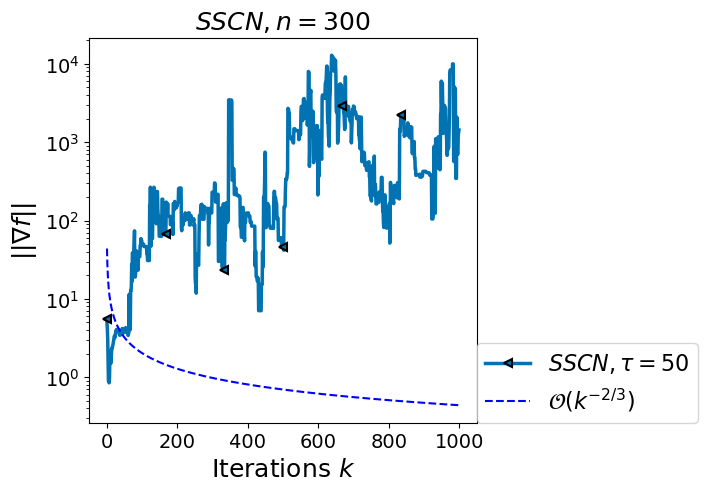

In [118]:
rep = 1
seed = 31415

np.random.seed(seed)

tolerance = 1e-5
max_newton_iter = 1000
solver = 'exact'



data_path = 'datasets/'
plots_path = os.getcwd()+'/plots/'

# datasets = ['w1a', 'phishing', 'mushrooms', 'a1a', 'duke', 'madelon', 'gisette_scale',  'w8a', 'a9a']
datasets = ['w1a']

# taus=[100]

for dataset in datasets:
    print(dataset)
    
    datapath = data_path + dataset + '.txt'

    data = load_svmlight_file(datapath)
    X, Y = data[0].toarray(), data[1]
    
    np.random.seed(314159)
        
    w_0 = np.random.randn(X.shape[1])
    
    w_k, SSCN_results_const_exact_grad_S_steps = do_experiment_nonconvex(X, Y, w_0, 
                                                  loss_logist_l_nc, grad_x_logist_l_nc, 
                                                  hess_vec_logist_l_nc, hessian_logist_l_nc, 
                                                  solver, rep=rep, taus=[50], 
                                                  schedule='constant', figurename='w1a_square_loss_nonconvex_adaptive',
                                                  eps_1=0.1,eps_2=0.1)
                  

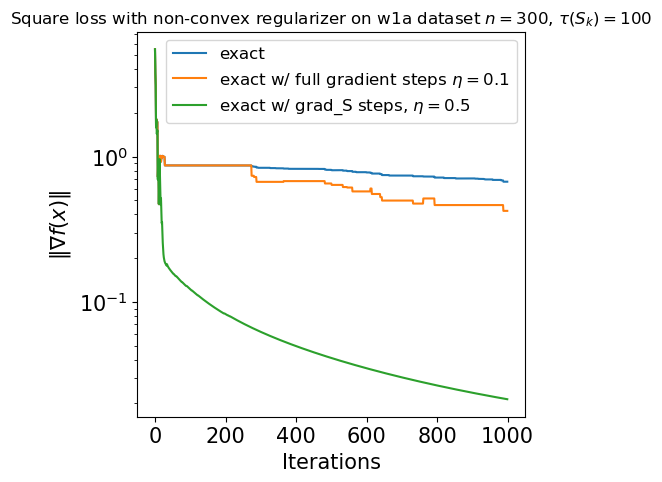

In [148]:
grad_norm_exact = SSCN_results_const_exact[0][0]['grad']
grad_norm_full_grad_steps = SSCN_results_const_exact_grad_S_steps[0][0]['grad']
grad_norm_grad_s_steps = SSCN_results_const_exact_grad_steps[0][0]['grad']

plt.semilogy(grad_norm_exact, label='exact')
plt.semilogy(grad_norm_full_grad_steps, label='exact w/ full gradient steps $\eta = 0.1$')
plt.semilogy(grad_norm_grad_s_steps, label='exact w/ grad_S steps, $\eta = 0.5$')

plt.legend(fontsize=12)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel(r'$\|\nabla f(x)\|$', fontsize=15)
plt.title(r'Square loss with non-convex regularizer on w1a dataset $n=300$, $\tau(S_k) = 100$')

plt.savefig('plots/square_loss_nonconvex_w1a_tau=100_exact_w_gradient_steps.pdf', bbox_inches='tight')

w1a
Logistic loss w/ non-convex regularization. 
 Experiment: 	 #dim = 300 	 lam = 0.001000
||h||:  1.2291146957385735
model decr.:  1.9435018361393859
func decr. :  3.4213052490804285
func_T:  7.255936440116321
norm(grd_k):  5.490548439759114
norm(grad_k_S):  2.658867473172739
H_k:  1.0
||h||:  0.8168115153598967
model decr.:  0.432335892229402
func decr. :  1.4349667898893719
func_T:  5.8209696502269495
norm(grd_k):  3.731083580090068
norm(grad_k_S):  0.9473971766322353
H_k:  0.5
||h||:  1.370303316732403
model decr.:  1.1676521887658367
func decr. :  1.2354420581676777
func_T:  4.585527592059272
norm(grd_k):  2.731880999484872
norm(grad_k_S):  1.5477468233937985
H_k:  0.25
||h||:  2.054474767234099
model decr.:  2.7238754075620806
func decr. :  -0.23400574730702317
func_T:  4.819533339366295
norm(grd_k):  1.2455329214590076
norm(grad_k_S):  2.4757819218080024
H_k:  0.125
cubic step failed
gradient step successful
||h||:  1.2940352985915717
model decr.:  1.0428294843334136
func decr.

func_k - func_T -0.014986852396668082
norm(grd_k):  0.7827725293634445
norm(tmp_w_k - w_k): 0.10039198827441873
||h||:  0.06376686160720099
model decr.:  0.01880222444802291
func decr. :  0.02864449875977937
func_T:  1.3317227813487245
norm(grd_k):  0.7827725293634445
norm(grad_k_S):  0.4560242151121608
H_k:  98.63737614860293
||h||:  0.09006864455090463
model decr.:  0.026891161610000977
func decr. :  -0.026157230914217733
func_T:  1.3578800122629422
norm(grd_k):  0.7073745435123034
norm(grad_k_S):  0.463762268057118
H_k:  49.31868807430146
cubic step failed
func_k - func_T -0.07896518886551562
norm(grd_k):  0.7073745435123034
norm(tmp_w_k - w_k): 0.231881134028559
||h||:  0.05296440620163477
model decr.:  0.007456841037107571
func decr. :  0.0021989454476669668
func_T:  1.3295238359010575
norm(grd_k):  0.7073745435123034
norm(grad_k_S):  0.21240424082122222
H_k:  73.9780321114522
||h||:  0.06309635702133069
model decr.:  0.013499057569341423
func decr. :  -0.010328246645504136
func_T

model decr.:  8.949931680798961e-05
func decr. :  0.0001210584800646064
func_T:  1.3217351603902239
norm(grd_k):  0.7069699907594846
norm(grad_k_S):  0.44993790519514604
H_k:  5049380.774725299
||h||:  0.00033219385802597167
model decr.:  6.171061920351092e-05
func decr. :  4.8227477663864704e-05
func_T:  1.32168693291256
norm(grd_k):  0.7066170476455702
norm(grad_k_S):  0.27866492569512025
H_k:  2524690.3873626497
||h||:  0.00041069943415660535
model decr.:  0.00011663859005849842
func decr. :  -6.073983802146188e-05
func_T:  1.3217476727505815
norm(grd_k):  0.7066577121094857
norm(grad_k_S):  0.4260498635169736
H_k:  2524690.3873626497
cubic step failed
func_k - func_T -0.042543105964480965
norm(grd_k):  0.7066577121094857
norm(tmp_w_k - w_k): 0.2130249317584868
||h||:  0.0004168104318915376
model decr.:  0.00018290647556882633
func decr. :  -0.00012325208037289315
func_T:  1.321810184992933
norm(grd_k):  0.7066577121094857
norm(grad_k_S):  0.6583398497889574
H_k:  3787035.5810439745

model decr.:  3.0767798636884076e-06
func decr. :  -2.2642014152474133e-06
func_T:  1.3203878275326972
norm(grd_k):  0.7114292521549945
norm(grad_k_S):  0.35652021341333623
H_k:  2127445558.6459064
cubic step failed
func_k - func_T -0.04370609154804139
norm(grd_k):  0.7114292521549945
norm(tmp_w_k - w_k): 0.1782601067066681
||h||:  1.148420406428882e-05
model decr.:  3.2223068376289162e-06
func decr. :  -2.198509981399255e-06
func_T:  1.3203877618412634
norm(grd_k):  0.7114292521549945
norm(grad_k_S):  0.42088084679140386
H_k:  3191168337.9688597
cubic step failed
func_k - func_T -0.054573235778981655
norm(grd_k):  0.7114292521549945
norm(tmp_w_k - w_k): 0.21044042339570196
||h||:  8.057173771153373e-06
model decr.:  1.6691768283852129e-06
func decr. :  -9.256271902291502e-07
func_T:  1.3203864889584722
norm(grd_k):  0.7114292521549945
norm(grad_k_S):  0.3107508724300391
H_k:  4786752506.953289
cubic step failed
func_k - func_T -0.02419832986329551
norm(grd_k):  0.7114292521549945
norm

||h||:  2.940498271306649e-07
model decr.:  1.5383155264254978e-07
func decr. :  -5.2641645265083525e-08
func_T:  1.320383974657708
norm(grd_k):  0.7114259339458832
norm(grad_k_S):  0.7847219120625476
H_k:  9075568108277.645
cubic step failed
func_k - func_T -0.11875395723508575
norm(grd_k):  0.7114259339458832
norm(tmp_w_k - w_k): 0.39236095603127386
||h||:  1.5323392271652774e-07
model decr.:  3.2654171526130837e-08
func decr. :  -1.9766343006821785e-08
func_T:  1.3203839417824057
norm(grd_k):  0.7114259339458832
norm(grad_k_S):  0.3196502435050392
H_k:  13613352162416.467
cubic step failed
func_k - func_T -0.0280585786666796
norm(grd_k):  0.7114259339458832
norm(tmp_w_k - w_k): 0.1598251217525196
||h||:  1.0762934578220957e-07
model decr.:  1.6972945425201607e-08
func decr. :  -1.0789786397680245e-08
func_T:  1.320383932805849
norm(grd_k):  0.7114259339458832
norm(grad_k_S):  0.23654718532507646
H_k:  20420028243624.7
cubic step failed
func_k - func_T -0.013463894532537823
norm(grd_

model decr.:  6.326587437950107e-11
func decr. :  -4.0741632290064445e-11
func_T:  1.3203839056503288
norm(grd_k):  0.7114259098992755
norm(grad_k_S):  0.33518005114762184
H_k:  4.1813155239396173e+18
cubic step failed
func_k - func_T -0.034040160302772016
norm(grd_k):  0.7114259098992755
norm(tmp_w_k - w_k): 0.16759002557381092
||h||:  2.5197975780538836e-10
model decr.:  6.689750234835622e-11
func decr. :  -4.4920511754753534e-11
func_T:  1.3203839056545077
norm(grd_k):  0.7114259098992755
norm(grad_k_S):  0.398231407180629
H_k:  6.271973285909426e+18
cubic step failed
func_k - func_T -0.04716065538809544
norm(grd_k):  0.7114259098992755
norm(tmp_w_k - w_k): 0.1991157035903145
||h||:  1.7083007715532876e-10
model decr.:  3.1267791771778766e-11
func decr. :  -2.990829806037709e-11
func_T:  1.3203839056394955
norm(grd_k):  0.7114259098992755
norm(grad_k_S):  0.27455169746611496
H_k:  9.40795992886414e+18
cubic step failed
func_k - func_T -0.028676390521865214
norm(grd_k):  0.7114259098

||h||:  6.3060464785953e-13
model decr.:  2.4154250603151277e-13
func decr. :  -2.007283228522283e-13
func_T:  1.3203839054502673
norm(grd_k):  0.7114259096284903
norm(grad_k_S):  0.5745497758019495
H_k:  1.4448186027158048e+24
cubic step failed
func_k - func_T -0.12930101032147356
norm(grd_k):  0.7114259096284903
norm(tmp_w_k - w_k): 0.2872748879009748
||h||:  4.897676334495754e-13
model decr.:  1.6973975392145157e-13
func decr. :  -1.0147438445073931e-13
func_T:  1.320383905450168
norm(grd_k):  0.7114259096284903
norm(grad_k_S):  0.5198580173396433
H_k:  2.1672279040737072e+24
cubic step failed
func_k - func_T -0.08083488022436058
norm(grd_k):  0.7114259096284903
norm(tmp_w_k - w_k): 0.25992900866982166
||h||:  3.7942691527503173e-13
model decr.:  1.183829039112527e-13
func decr. :  -7.882583474838611e-14
func_T:  1.3203839054501454
norm(grd_k):  0.7114259096284903
norm(grad_k_S):  0.4680067457475613
H_k:  3.250841856110561e+24
cubic step failed
func_k - func_T -0.06711716429020687
n

model decr.:  1.6502542115018921e-15
func decr. :  -4.440892098500626e-16
func_T:  1.320383905449867
norm(grd_k):  0.7114259096282809
norm(grad_k_S):  0.24618369679872826
H_k:  2.4349701926085744e+27
cubic step failed
func_k - func_T -0.006131460652907261
norm(grd_k):  0.7114259096282809
norm(tmp_w_k - w_k): 0.12309184839936411
||h||:  1.3256395537722666e-14
model decr.:  5.6724413057553226e-15
func decr. :  -2.886579864025407e-15
func_T:  1.3203839054498694
norm(grd_k):  0.7114259096282809
norm(grad_k_S):  0.6418533555686838
H_k:  3.6524552889128616e+27
cubic step failed
func_k - func_T -0.10939126752038608
norm(grd_k):  0.7114259096282809
norm(tmp_w_k - w_k): 0.3209266777843419
||h||:  6.790891448309422e-15
model decr.:  1.1438399833139964e-15
func decr. :  1.5543122344752192e-15
func_T:  1.320383905449865
norm(grd_k):  0.7114259096282809
norm(grad_k_S):  0.2526560743947882
H_k:  5.478682933369292e+27
||h||:  1.027974799368999e-14
model decr.:  1.9838202407146763e-15
func decr. :  -1

||h||:  2.5328600768252536e-17
model decr.:  4.557286945202284e-18
func decr. :  0.0
func_T:  1.2297250605903949
norm(grd_k):  0.5851363712866183
norm(grad_k_S):  0.2698897771870503
H_k:  4.2069179080088e+32
cubic step failed
gradient step successful
||h||:  2.4022347135530577e-17
model decr.:  5.831903818461881e-18
func decr. :  0.0
func_T:  1.2028833148758373
norm(grd_k):  0.5077424466672038
norm(grad_k_S):  0.3641549128542142
H_k:  6.3103768620131995e+32
cubic step failed
func_k - func_T -0.01662075314500866
norm(grd_k):  0.5077424466672038
norm(tmp_w_k - w_k): 0.18207745642710713
||h||:  2.5559582217024186e-17
model decr.:  1.0536989540021098e-17
func decr. :  0.0
func_T:  1.2028833148758373
norm(grd_k):  0.5077424466672038
norm(grad_k_S):  0.6183780382569891
H_k:  9.465565293019799e+32
cubic step failed
func_k - func_T -0.08147646341635872
norm(grd_k):  0.5077424466672038
norm(tmp_w_k - w_k): 0.3091890191284945
||h||:  1.9276752584339854e-17
model decr.:  6.780288530640645e-18
fun

||h||:  4.491489695174275e-21
model decr.:  1.4225233364301093e-21
func decr. :  0.0
func_T:  1.059351896831805
norm(grd_k):  0.4901396630596014
norm(grad_k_S):  0.4750728932847679
H_k:  2.354937773635707e+40
cubic step failed
func_k - func_T -0.047114782215976314
norm(grd_k):  0.4901396630596014
norm(tmp_w_k - w_k): 0.23753644664238394
||h||:  2.185116620114474e-21
model decr.:  2.456989479201761e-22
func decr. :  0.0
func_T:  1.059351896831805
norm(grd_k):  0.4901396630596014
norm(grad_k_S):  0.16866304456599518
H_k:  3.53240666045356e+40
cubic step failed
gradient step successful
||h||:  3.3683678455114253e-21
model decr.:  1.3499859038034797e-21
func decr. :  0.0
func_T:  1.0552878647491717
norm(grd_k):  0.4947638246595065
norm(grad_k_S):  0.6011750938673871
H_k:  5.29860999068034e+40
cubic step failed
func_k - func_T -0.07422331685896544
norm(grd_k):  0.4947638246595065
norm(tmp_w_k - w_k): 0.30058754693369355
||h||:  2.7034767558834188e-21
model decr.:  1.0469594802329934e-21
fun

||h||:  4.0438578495530803e-25
model decr.:  1.307596458842409e-25
func decr. :  0.0
func_T:  0.9764254066723752
norm(grd_k):  0.4344555664180827
norm(grad_k_S):  0.48503057259551885
H_k:  2.966042382491522e+48
cubic step failed
func_k - func_T -0.03358277906668983
norm(grd_k):  0.4344555664180827
norm(tmp_w_k - w_k): 0.24251528629775945
||h||:  4.0791708805146895e-25
model decr.:  2.0132284019514176e-25
func decr. :  0.0
func_T:  0.9764254066723752
norm(grd_k):  0.4344555664180827
norm(grad_k_S):  0.7403079428106962
H_k:  4.449063573737283e+48
cubic step failed
func_k - func_T -0.07030157399012849
norm(grd_k):  0.4344555664180827
norm(tmp_w_k - w_k): 0.3701539714053481
||h||:  2.9924859785300717e-25
model decr.:  1.1922435567256146e-25
func decr. :  0.0
func_T:  0.9764254066723752
norm(grd_k):  0.4344555664180827
norm(grad_k_S):  0.597618618071814
H_k:  6.673595360605925e+48
cubic step failed
func_k - func_T -0.06289250867452756
norm(grd_k):  0.4344555664180827
norm(tmp_w_k - w_k): 0.

||h||:  3.192567723017455e-29
model decr.:  5.402728039228816e-30
func decr. :  0.0
func_T:  0.9185909595592364
norm(grd_k):  0.33969544691612336
norm(grad_k_S):  0.2538424478959413
H_k:  2.490485456622483e+56
cubic step failed
func_k - func_T -0.008771560042656001
norm(grd_k):  0.33969544691612336
norm(tmp_w_k - w_k): 0.12692122394797065
||h||:  3.9928141873696276e-29
model decr.:  1.5853359571254678e-29
func decr. :  0.0
func_T:  0.9185909595592364
norm(grd_k):  0.33969544691612336
norm(grad_k_S):  0.595570899144389
H_k:  3.7357281849337247e+56
cubic step failed
func_k - func_T -0.014162113181750535
norm(grd_k):  0.33969544691612336
norm(tmp_w_k - w_k): 0.2977854495721945
||h||:  2.980607709051066e-29
model decr.:  9.892128065063465e-30
func decr. :  0.0
func_T:  0.9185909595592364
norm(grd_k):  0.33969544691612336
norm(grad_k_S):  0.49782438838015425
H_k:  5.6035922774005875e+56
cubic step failed
gradient step successful
||h||:  2.1903542691923275e-29
model decr.:  5.88856697262263e

||h||:  3.892902997019834e-33
model decr.:  1.233705252996166e-33
func decr. :  0.0
func_T:  0.8515153122383551
norm(grd_k):  0.37922950101050007
norm(grad_k_S):  0.4753670669191916
H_k:  3.136764588864989e+64
cubic step failed
func_k - func_T -0.04168337600387617
norm(grd_k):  0.37922950101050007
norm(tmp_w_k - w_k): 0.2376835334595958
||h||:  2.592777549640593e-33
model decr.:  5.4673603545149105e-34
func decr. :  0.0
func_T:  0.8515153122383551
norm(grd_k):  0.37922950101050007
norm(grad_k_S):  0.316303283824298
H_k:  4.705146883297483e+64
cubic step failed
func_k - func_T -0.018092875122892482
norm(grd_k):  0.37922950101050007
norm(tmp_w_k - w_k): 0.15815164191214898
||h||:  2.3845543438438184e-33
model decr.:  6.379620705044164e-34
func decr. :  0.0
func_T:  0.8515153122383551
norm(grd_k):  0.37922950101050007
norm(grad_k_S):  0.4013089943733743
H_k:  7.057720324946225e+64
cubic step failed
func_k - func_T -0.033729301372213194
norm(grd_k):  0.37922950101050007
norm(tmp_w_k - w_k)

||h||:  3.0100519826115625e-37
model decr.:  7.183077817963759e-38
func decr. :  0.0
func_T:  0.8096110520730996
norm(grd_k):  0.3429668518723683
norm(grad_k_S):  0.3579545067390309
H_k:  3.950752677472398e+72
cubic step failed
func_k - func_T -0.02060271979320316
norm(grd_k):  0.3429668518723683
norm(tmp_w_k - w_k): 0.1789772533695154
||h||:  2.6162875299866556e-37
model decr.:  7.075159857075208e-38
func decr. :  0.0
func_T:  0.8096110520730996
norm(grd_k):  0.3429668518723683
norm(grad_k_S):  0.40564118675698246
H_k:  5.926129016208597e+72
cubic step failed
func_k - func_T -0.03980353437976569
norm(grd_k):  0.3429668518723683
norm(tmp_w_k - w_k): 0.20282059337849126
||h||:  2.32024607392348e-37
model decr.:  7.402411802251196e-38
func decr. :  0.0
func_T:  0.8096110520730996
norm(grd_k):  0.3429668518723683
norm(grad_k_S):  0.4785534529361726
H_k:  8.889193524312896e+72
cubic step failed
func_k - func_T -0.047399909681382524
norm(grd_k):  0.3429668518723683
norm(tmp_w_k - w_k): 0.23

||h||:  3.438890837839112e-41
model decr.:  1.3490923224034542e-41
func decr. :  0.0
func_T:  0.8011609270013521
norm(grd_k):  0.3629237972393516
norm(grad_k_S):  0.58845673766044
H_k:  4.975970072463456e+80
cubic step failed
func_k - func_T -0.0630007945797334
norm(grd_k):  0.3629237972393516
norm(tmp_w_k - w_k): 0.2942283688302201
||h||:  2.5819843609089187e-41
model decr.:  8.565221173313372e-42
func decr. :  0.0
func_T:  0.8011609270013521
norm(grd_k):  0.3629237972393516
norm(grad_k_S):  0.4975952586888376
H_k:  7.463955108695184e+80
cubic step failed
func_k - func_T -0.052502576718556515
norm(grd_k):  0.3629237972393516
norm(tmp_w_k - w_k): 0.24879762934441876
||h||:  1.4722857529805367e-41
model decr.:  2.382019691175161e-42
func decr. :  0.0
func_T:  0.8011609270013521
norm(grd_k):  0.3629237972393516
norm(grad_k_S):  0.2426858732776161
H_k:  1.1195932663042777e+81
cubic step failed
func_k - func_T -0.01581673832514552
norm(grd_k):  0.3629237972393516
norm(tmp_w_k - w_k): 0.121

||h||:  2.8944473463632717e-45
model decr.:  1.0131677981371917e-45
func decr. :  0.0
func_T:  0.7622702483568107
norm(grd_k):  0.3000774905402089
norm(grad_k_S):  0.5250576415270706
H_k:  6.267230622467876e+88
cubic step failed
func_k - func_T -0.043064147236300254
norm(grd_k):  0.3000774905402089
norm(tmp_w_k - w_k): 0.2625288207635353
||h||:  2.100354257022052e-45
model decr.:  5.8070201134405875e-46
func decr. :  0.0
func_T:  0.7622702483568107
norm(grd_k):  0.3000774905402089
norm(grad_k_S):  0.4147171907329073
H_k:  9.400845933701814e+88
cubic step failed
func_k - func_T -0.02540090866776956
norm(grd_k):  0.3000774905402089
norm(tmp_w_k - w_k): 0.20735859536645365
||h||:  1.1074478697398266e-45
model decr.:  1.2768409761282297e-46
func decr. :  0.0
func_T:  0.7622702483568107
norm(grd_k):  0.3000774905402089
norm(grad_k_S):  0.17294371288485993
H_k:  1.410126890055272e+89
cubic step failed
gradient step successful
||h||:  1.5684144791620917e-45
model decr.:  5.440523908180941e-46

||h||:  2.1984793963240443e-49
model decr.:  5.59177300714456e-50
func decr. :  0.0
func_T:  0.7386279254343633
norm(grd_k):  0.29914034632849323
norm(grad_k_S):  0.3815209514695193
H_k:  7.893572329255111e+96
cubic step failed
func_k - func_T -0.029303111574751517
norm(grd_k):  0.29914034632849323
norm(tmp_w_k - w_k): 0.19076047573475968
||h||:  1.8018913636770563e-49
model decr.:  4.618058222660482e-50
func decr. :  0.0
func_T:  0.7386279254343633
norm(grd_k):  0.29914034632849323
norm(grad_k_S):  0.3844342380250306
H_k:  1.1840358493882666e+97
cubic step failed
func_k - func_T -0.02321882615272919
norm(grd_k):  0.29914034632849323
norm(tmp_w_k - w_k): 0.1922171190125153
||h||:  1.8675083592134824e-49
model decr.:  7.711742418832778e-50
func decr. :  0.0
func_T:  0.7386279254343633
norm(grd_k):  0.29914034632849323
norm(grad_k_S):  0.6194142891612527
H_k:  1.7760537740824e+97
cubic step failed
func_k - func_T -0.067521636924604
norm(grd_k):  0.29914034632849323
norm(tmp_w_k - w_k): 0

||h||:  1.1317935658941244e-53
model decr.:  9.609082285185087e-55
func decr. :  0.0
func_T:  0.7207171335389189
norm(grd_k):  0.31285954388595094
norm(grad_k_S):  0.12735205307860872
H_k:  9.941948504943701e+104
cubic step failed
func_k - func_T -0.00016413930307668245
norm(grd_k):  0.31285954388595094
norm(tmp_w_k - w_k): 0.06367602653930436
||h||:  1.7911467589988431e-53
model decr.:  5.713010523406304e-54
func decr. :  0.0
func_T:  0.7207171335389189
norm(grd_k):  0.31285954388595094
norm(grad_k_S):  0.47843738889935333
H_k:  1.4912922757415552e+105
cubic step failed
func_k - func_T -0.030657224757678514
norm(grd_k):  0.31285954388595094
norm(tmp_w_k - w_k): 0.23921869444967664
||h||:  1.5111820273771424e-53
model decr.:  5.1465134004810835e-54
func decr. :  0.0
func_T:  0.7207171335389189
norm(grd_k):  0.31285954388595094
norm(grad_k_S):  0.5108431652089135
H_k:  2.2369384136123326e+105
cubic step failed
func_k - func_T -0.027460380941555007
norm(grd_k):  0.31285954388595094
norm(

||h||:  1.1003008231463761e-57
model decr.:  1.1120196983844208e-58
func decr. :  0.0
func_T:  0.6995939012890432
norm(grd_k):  0.25270569243498886
norm(grad_k_S):  0.15159759153926658
H_k:  1.2521876781773887e+113
cubic step failed
func_k - func_T -0.0016745112821751063
norm(grd_k):  0.25270569243498886
norm(tmp_w_k - w_k): 0.07579879576963337
||h||:  1.6800181315620633e-57
model decr.:  5.937605407239411e-58
func decr. :  0.0
func_T:  0.6995939012890432
norm(grd_k):  0.25270569243498886
norm(grad_k_S):  0.5301376183707037
H_k:  1.878281517266083e+113
cubic step failed
func_k - func_T -0.04214031738147106
norm(grd_k):  0.25270569243498886
norm(tmp_w_k - w_k): 0.26506880918535186
||h||:  1.615179765239663e-57
model decr.:  7.914496302219339e-58
func decr. :  0.0
func_T:  0.6995939012890432
norm(grd_k):  0.25270569243498886
norm(grad_k_S):  0.7350107219531353
H_k:  2.8174222758991244e+113
cubic step failed
func_k - func_T -0.049682517410731486
norm(grd_k):  0.25270569243498886
norm(tmp_

||h||:  1.8267490794768573e-61
model decr.:  6.409332096464906e-62
func decr. :  0.0
func_T:  0.697925165291052
norm(grd_k):  0.2723756435093976
norm(grad_k_S):  0.5262900226806521
H_k:  1.5771294536474352e+121
cubic step failed
func_k - func_T -0.04155391576810641
norm(grd_k):  0.2723756435093976
norm(tmp_w_k - w_k): 0.263145011340326
||h||:  1.1567623552816782e-61
model decr.:  2.441179886573657e-62
func decr. :  0.0
func_T:  0.697925165291052
norm(grd_k):  0.2723756435093976
norm(grad_k_S):  0.3165533363997502
H_k:  2.365694180471153e+121
cubic step failed
func_k - func_T -0.014958508299393158
norm(grd_k):  0.2723756435093976
norm(tmp_w_k - w_k): 0.15827666819987513
||h||:  9.995540398490313e-62
model decr.:  2.362530575730742e-62
func decr. :  0.0
func_T:  0.697925165291052
norm(grd_k):  0.2723756435093976
norm(grad_k_S):  0.3545376960440632
H_k:  3.5485412707067296e+121
cubic step failed
func_k - func_T -0.027084403564240023
norm(grd_k):  0.2723756435093976
norm(tmp_w_k - w_k): 0.

||h||:  1.928158202934265e-65
model decr.:  6.328644984927474e-66
func decr. :  0.0
func_T:  0.6912098248276959
norm(grd_k):  0.3200892131231601
norm(grad_k_S):  0.4923334331666791
H_k:  1.3242622528611585e+129
cubic step failed
func_k - func_T -0.04942207333932647
norm(grd_k):  0.3200892131231601
norm(tmp_w_k - w_k): 0.24616671658333952
||h||:  1.379531471513013e-65
model decr.:  3.476712969603905e-66
func decr. :  0.0
func_T:  0.6912098248276959
norm(grd_k):  0.3200892131231601
norm(grad_k_S):  0.37803193055727735
H_k:  1.9863933792917377e+129
cubic step failed
func_k - func_T -0.03449859684637213
norm(grd_k):  0.3200892131231601
norm(tmp_w_k - w_k): 0.18901596527863868
||h||:  1.4588736290917193e-65
model decr.:  6.167629555304278e-66
func decr. :  0.0
func_T:  0.6912098248276959
norm(grd_k):  0.3200892131231601
norm(grad_k_S):  0.6341498090356377
H_k:  2.979590068937607e+129
cubic step failed
func_k - func_T -0.04585496856755067
norm(grd_k):  0.3200892131231601
norm(tmp_w_k - w_k):

||h||:  1.0206966430623336e-69
model decr.:  1.1824171407545037e-70
func decr. :  0.0
func_T:  0.6883040986025952
norm(grd_k):  0.34944002887611636
norm(grad_k_S):  0.17376619421520337
H_k:  1.6679073271035442e+137
cubic step failed
func_k - func_T -0.0028649785150864915
norm(grd_k):  0.34944002887611636
norm(tmp_w_k - w_k): 0.08688309710760173
||h||:  1.2533009428877495e-69
model decr.:  3.283507523594322e-70
func decr. :  0.0
func_T:  0.6883040986025952
norm(grd_k):  0.34944002887611636
norm(grad_k_S):  0.39298313093446774
H_k:  2.501860990655316e+137
cubic step failed
func_k - func_T -0.04137392101563975
norm(grd_k):  0.34944002887611636
norm(tmp_w_k - w_k): 0.19649156546723387
||h||:  9.962450793463596e-70
model decr.:  2.473783814117231e-70
func decr. :  0.0
func_T:  0.6883040986025952
norm(grd_k):  0.34944002887611636
norm(grad_k_S):  0.3724661529681467
H_k:  3.752791485982974e+137
cubic step failed
func_k - func_T -0.030746482037891765
norm(grd_k):  0.34944002887611636
norm(tmp_

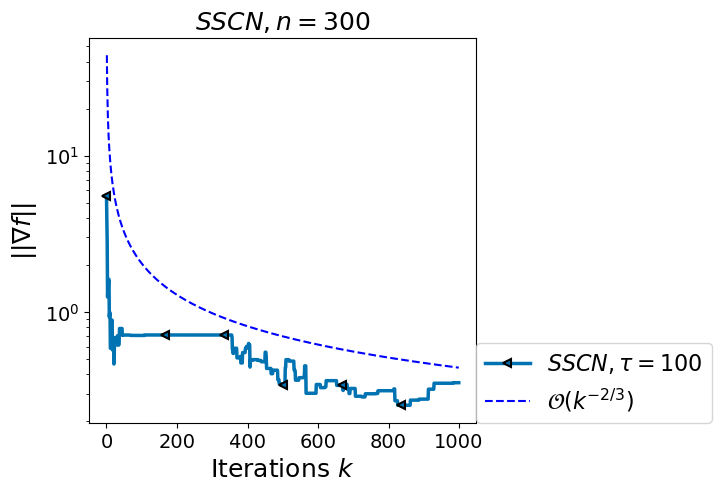

In [153]:
rep = 1
seed = 31415

np.random.seed(seed)

tolerance = 1e-5
max_newton_iter = 1000
solver = 'cauchy_point'



data_path = 'datasets/'
plots_path = os.getcwd()+'/plots/'

# datasets = ['w1a', 'phishing', 'mushrooms', 'a1a', 'duke', 'madelon', 'gisette_scale',  'w8a', 'a9a']
datasets = ['w1a']

for dataset in datasets:
    print(dataset)
    
    datapath = data_path + dataset + '.txt'

    data = load_svmlight_file(datapath)
    X, Y = data[0].toarray(), data[1]
    
    np.random.seed(314159)
        
    w_0 = np.random.randn(X.shape[1])
    
    SSCN_results_const_cauchy_pt = do_experiment_nonconvex(X, Y, w_0, 
                                                  loss_logist_l_nc, grad_x_logist_l_nc, 
                                                  hess_vec_logist_l_nc, hessian_logist_l_nc, 
                                                  solver, rep=rep, taus=[100], 
                                                  schedule='constant', figurename='w1a_square_loss_nonconvex_cauchy_pt')
                  

w1a
Logistic loss w/ non-convex regularization. 
 Experiment: 	 #dim = 300 	 lam = 0.001000
model decr.:  1.9435018361393859
func decr. :  3.4213052490804285
func_T:  7.255936440116321
norm(grd_k):  5.490548439759114
norm(grad_k_S):  2.658867473172739
H_k:  1.0
model decr.:  0.4157472665233152
func decr. :  1.2069864875426397
func_T:  6.048949952573682
norm(grd_k):  3.731083580090068
norm(grad_k_S):  0.8189749660034734
H_k:  0.5
model decr.:  1.4552351522237712
func decr. :  1.6224137496499562
func_T:  4.426536202923725
norm(grd_k):  3.0712602765911856
norm(grad_k_S):  1.7156937779175623
H_k:  0.25
model decr.:  0.7034964574650524
func decr. :  0.6473852295791462
func_T:  3.779150973344579
norm(grd_k):  1.5272179024127073
norm(grad_k_S):  0.8325206217538357
H_k:  0.125
model decr.:  2.1231784441270545
func decr. :  0.36143944455604604
func_T:  3.417711528788533
norm(grd_k):  0.9214577985930085
norm(grad_k_S):  1.853498623935135
H_k:  0.0625
model decr.:  0.3405829802382945
func decr. :

model decr.:  0.0014980758420289116
func decr. :  -0.0021919025644297485
func_T:  0.4987580552532564
norm(grd_k):  0.6242345885673285
norm(grad_k_S):  0.24215988974961508
H_k:  2699.544023666995
model decr.:  0.000690481721133706
func decr. :  -0.001769085519537028
func_T:  0.4983352382083637
norm(grd_k):  0.6242345885673285
norm(grad_k_S):  0.16622174172134152
H_k:  4049.316035500493
model decr.:  0.0018222708219121932
func decr. :  -0.0019712240236767764
func_T:  0.4985373767125034
norm(grd_k):  0.6242345885673285
norm(grad_k_S):  0.35979620434480847
H_k:  6073.974053250739
model decr.:  0.0006976333705802414
func decr. :  -0.0016056858711717692
func_T:  0.4981718385599984
norm(grd_k):  0.6242345885673285
norm(grad_k_S):  0.21746490796497395
H_k:  9110.96107987611
model decr.:  0.001487803402391828
func decr. :  -0.001209986690406617
func_T:  0.49777613937923326
norm(grd_k):  0.6242345885673285
norm(grad_k_S):  0.4099189862751132
H_k:  13666.441619814164
model decr.:  0.0012263587844

model decr.:  9.03447185960462e-09
func decr. :  -3.400237996720179e-08
func_T:  0.4965661407094016
norm(grd_k):  0.6242344465049994
norm(grad_k_S):  0.12165216846523987
H_k:  9803269134240.336
model decr.:  2.2084070933179768e-08
func decr. :  -3.923766961344555e-08
func_T:  0.49656614594469123
norm(grd_k):  0.6242344465049994
norm(grad_k_S):  0.252697579916586
H_k:  14704903701360.504
model decr.:  1.4218523390654795e-08
func decr. :  -2.9339115081850053e-08
func_T:  0.4965661360461367
norm(grd_k):  0.6242344465049994
norm(grad_k_S):  0.21568257963802046
H_k:  22057355552040.758
model decr.:  1.362727370187805e-08
func decr. :  -2.754347028233184e-08
func_T:  0.4965661342504919
norm(grd_k):  0.6242344465049994
norm(grad_k_S):  0.24000214081806517
H_k:  33086033328061.137
model decr.:  6.2974867151909665e-09
func decr. :  -1.8215421171419166e-08
func_T:  0.4965661249224428
norm(grd_k):  0.6242344465049994
norm(grad_k_S):  0.16421685599272431
H_k:  49629049992091.7
model decr.:  4.2342

model decr.:  2.2258205349594947e-12
func decr. :  -3.4716118868516332e-12
func_T:  0.49656610607568874
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.1661639465093997
H_k:  4.115736739013273e+20
model decr.:  4.271481683000846e-12
func decr. :  -4.889755267356577e-12
func_T:  0.4965661060771069
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.29373756282397184
H_k:  6.17360510851991e+20
model decr.:  4.865063472097189e-13
func decr. :  -2.2377655284344655e-12
func_T:  0.4965661060744549
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.07900657133899228
H_k:  9.260407662779864e+20
model decr.:  4.647337084627701e-12
func decr. :  -5.148825810152857e-12
func_T:  0.49656610607736595
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.4071652858568036
H_k:  1.3890611494169797e+21
model decr.:  1.2765091274901187e-12
func decr. :  -2.940592214173421e-12
func_T:  0.4965661060751577
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.19694622628389385
H_k:  2.0835917241254695e+21


model decr.:  1.4270509255404787e-16
func decr. :  0.0
func_T:  0.49656610607221713
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.0889496812353483
H_k:  1.5359310743210458e+28
model decr.:  8.378739572383376e-16
func decr. :  -1.0547118733938987e-15
func_T:  0.4965661060722182
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.33138610611019004
H_k:  2.3038966114815687e+28
model decr.:  6.622566814549207e-16
func decr. :  -8.326672684688674e-16
func_T:  0.49656610607221796
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.32428720985627835
H_k:  3.4558449172223528e+28
model decr.:  2.655197785973564e-16
func decr. :  -4.996003610813204e-16
func_T:  0.49656610607221763
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.20184000995058118
H_k:  5.183767375833529e+28
model decr.:  4.467477441862275e-16
func decr. :  -3.3306690738754696e-16
func_T:  0.49656610607221746
norm(grd_k):  0.6242344439214373
norm(grad_k_S):  0.32684963621348845
H_k:  7.775651063750294e+28
model decr.:  4

model decr.:  5.942218438000331e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.1973360649293158
H_k:  9.672520255150243e+35
model decr.:  5.0474621862226936e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2026064145341561
H_k:  1.4508780382725363e+36
model decr.:  1.433391919050672e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.10020241665435681
H_k:  2.1763170574088045e+36
model decr.:  7.355669582236367e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.341255863853001
H_k:  3.264475586113207e+36
model decr.:  7.508158734078276e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3960208314065047
H_k:  4.89671337916981e+36
model decr.:  3.964847602986491e-20
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.62423

model decr.:  8.369971490462652e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3343372781684991
H_k:  2.3709583894359513e+46
model decr.:  2.6452803964335134e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.1775744093361046
H_k:  3.556437584153927e+46
model decr.:  7.25221747363589e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3981776404653227
H_k:  5.33465637623089e+46
model decr.:  5.326836036969632e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.37105614526734576
H_k:  8.001984564346335e+46
model decr.:  3.354807746161184e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3120821435149237
H_k:  1.2002976846519503e+47
model decr.:  1.792343583597442e-25
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.62423

model decr.:  6.039793572482458e-29
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3325165549672437
H_k:  4.479330504347373e+54
model decr.:  7.485185933651139e-30
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.09461587793036975
H_k:  6.71899575652106e+54
model decr.:  6.2345753262632594e-30
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.09588057553985699
H_k:  1.0078493634781589e+55
model decr.:  5.882933707540641e-29
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.49010120543684926
H_k:  1.5117740452172384e+55
model decr.:  1.8960452223091156e-29
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.26372583839503494
H_k:  2.2676610678258577e+55
model decr.:  2.783083178678831e-29
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0

model decr.:  2.825496465894544e-34
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.35403863286571324
H_k:  2.470471852828503e+65
model decr.:  1.2390744915877443e-34
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2339283405590225
H_k:  3.7057077792427545e+65
model decr.:  1.5915414149839098e-34
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.31641734221882867
H_k:  5.558561668864132e+65
model decr.:  6.195814466526351e-35
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.19311277503095708
H_k:  8.337842503296198e+65
model decr.:  4.959028499536086e-35
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.19056372096043683
H_k:  1.2506763754944297e+66
model decr.:  8.270259962380244e-35
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0

model decr.:  8.5704732106699e-39
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.1975848928528835
H_k:  4.6673362045543496e+73
model decr.:  1.630736296839297e-38
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.34729893071766277
H_k:  7.001004306831524e+73
model decr.:  7.937589576006094e-39
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.24600114786448612
H_k:  1.0501506460247287e+74
model decr.:  1.2566163932150925e-38
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.38251071715634916
H_k:  1.575225969037093e+74
model decr.:  5.889909548543428e-39
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2642071888868511
H_k:  2.3628389535556396e+74
model decr.:  6.374604850590385e-39
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.62

model decr.:  1.338550511420812e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.08844342626244937
H_k:  1.7161080522856556e+84
model decr.:  9.491134737578064e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.373667128456405
H_k:  2.5741620784284837e+84
model decr.:  1.2924769440217036e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.11321876802643384
H_k:  3.8612431176427255e+84
model decr.:  1.0160546467549218e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.11039388542134629
H_k:  5.791864676464088e+84
model decr.:  4.2473810274793305e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3279277805374062
H_k:  8.687797014696133e+84
model decr.:  2.5462310373509816e-44
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  

model decr.:  5.3743335535344945e-49
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.34483973940440543
H_k:  6.309866523534203e+94
model decr.:  1.3459314737280835e-49
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.15683631001345089
H_k:  9.464799785301304e+94
model decr.:  5.401842210440769e-49
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.4534085084776286
H_k:  1.4197199677951956e+95
model decr.:  2.219835893826498e-49
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2868838291094931
H_k:  2.1295799516927935e+95
model decr.:  1.5032913820500046e-49
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2532511079958529
H_k:  3.1943699275391903e+95
model decr.:  2.896217171045539e-50
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0

model decr.:  3.774668350409674e-53
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.29425198562970767
H_k:  7.947272215084026e+102
model decr.:  6.043645456978113e-54
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.09931845188802312
H_k:  1.192090832262604e+103
model decr.:  1.3793565025779318e-53
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.1970812884105807
H_k:  1.788136248393906e+103
model decr.:  1.0690185007265338e-53
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.1903479814216835
H_k:  2.682204372590859e+103
model decr.:  5.471865193123244e-54
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.13942654769612756
H_k:  4.023306558886289e+103
model decr.:  1.9558172383350832e-53
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):

model decr.:  3.7538218522391273e-57
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.41486753669680076
H_k:  2.2521562810628037e+111
model decr.:  1.992810547868666e-57
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.31136379297031186
H_k:  3.3782344215942056e+111
model decr.:  1.2115206451564681e-57
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2557849962037133
H_k:  5.067351632391308e+111
model decr.:  8.743829408166133e-58
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.23558776041191895
H_k:  7.601027448586962e+111
model decr.:  7.462334413844316e-58
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.24264154591806944
H_k:  1.1401541172880442e+112
model decr.:  4.100459350714656e-58
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_

model decr.:  1.5517930788462288e-62
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.35533779418808503
H_k:  8.280833776590186e+121
model decr.:  5.540829294257281e-63
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.20472260303480813
H_k:  1.242125066488528e+122
model decr.:  1.0461269484744578e-62
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3579886802242048
H_k:  1.863187599732792e+122
model decr.:  1.793403398353658e-63
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.12646260192109907
H_k:  2.794781399599188e+122
model decr.:  5.428287765639677e-63
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.30291151432873953
H_k:  4.192172099398782e+122
model decr.:  4.991746466450164e-64
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):

model decr.:  3.3058781261390436e-68
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.22394035127870981
H_k:  4.5671036649701796e+132
model decr.:  3.559718054501888e-68
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.2693076042055015
H_k:  6.850655497455269e+132
model decr.:  4.744847673627143e-68
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.3733792264459336
H_k:  1.0275983246182904e+133
model decr.:  1.7620742940423607e-69
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.047575336120034215
H_k:  1.5413974869274357e+133
model decr.:  4.858031871245944e-68
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.49701524988902807
H_k:  2.3120962303911534e+133
model decr.:  1.3574694567923383e-69
func decr. :  0.0
func_T:  0.4965661060722169
norm(gr

model decr.:  8.618238479165278e-73
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.11297521921464332
H_k:  8.628395527381839e+140
model decr.:  1.8771153911030915e-73
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.0468161024131552
H_k:  1.2942593291072758e+141
model decr.:  1.3572815773675908e-72
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.20039105421067713
H_k:  1.9413889936609138e+141
model decr.:  1.385894019973773e-72
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.23260307975239783
H_k:  2.9120834904913705e+141
model decr.:  2.7181612965968027e-73
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.08988268059423307
H_k:  4.368125235737056e+141
model decr.:  1.5367397581009925e-72
func decr. :  0.0
func_T:  0.4965661060722169
norm(gr

model decr.:  4.302498732413441e-77
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.38870103481118506
H_k:  1.41001284900384e+151
model decr.:  4.477412683582738e-78
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.09844274139747006
H_k:  2.11501927350576e+151
model decr.:  1.9695028762778463e-78
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.06517791273025648
H_k:  3.1725289102586395e+151
model decr.:  2.1269709672827487e-77
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.36453074496512683
H_k:  4.7587933653879593e+151
model decr.:  1.9061917362538174e-77
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.38788346198125423
H_k:  7.138190048081939e+151
model decr.:  7.25183446836124e-78
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k)

model decr.:  4.2900489142446413e-82
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.39918781923713537
H_k:  1.5361189134539644e+161
model decr.:  2.11266685166549e-82
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.28496195609953956
H_k:  2.3041783701809464e+161
model decr.:  2.006281891160691e-82
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.31515528397659126
H_k:  3.4562675552714195e+161
model decr.:  1.1453276682864794e-82
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.24826388398101437
H_k:  5.18440133290713e+161
model decr.:  6.225636267154704e-83
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k):  0.6242344439214369
norm(grad_k_S):  0.18928373306204394
H_k:  7.776601999360694e+161
model decr.:  7.675691527606602e-83
func decr. :  0.0
func_T:  0.4965661060722169
norm(grd_k

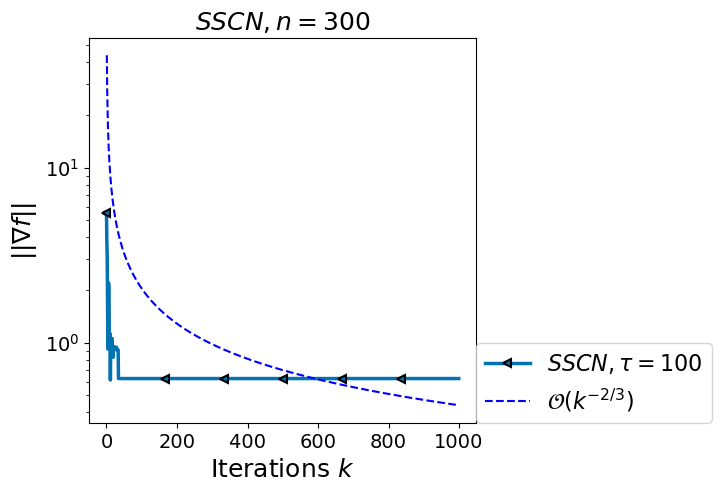

In [58]:
rep = 1
seed = 31415

np.random.seed(seed)

tolerance = 1e-5
max_newton_iter = 1000
solver = 'lanczos'



data_path = 'datasets/'
plots_path = os.getcwd()+'/plots/'

# datasets = ['w1a', 'phishing', 'mushrooms', 'a1a', 'duke', 'madelon', 'gisette_scale',  'w8a', 'a9a']
datasets = ['w1a']

for dataset in datasets:
    print(dataset)
    
    datapath = data_path + dataset + '.txt'

    data = load_svmlight_file(datapath)
    X, Y = data[0].toarray(), data[1]
    
    np.random.seed(314159)
        
    w_0 = np.random.randn(X.shape[1])
    
    SSCN_results_const_lanczos = do_experiment_nonconvex(X, Y, w_0, 
                                                  loss_logist_l_nc, grad_x_logist_l_nc, 
                                                  hess_vec_logist_l_nc, hessian_logist_l_nc, 
                                                  solver, rep=rep, taus=[100], 
                                                  schedule='constant', figurename='w1a_square_loss_nonconvex_lanczos')
                  

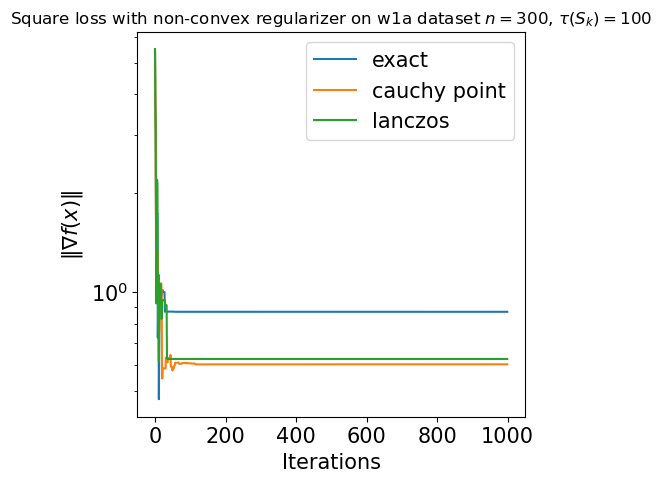

In [70]:
grad_norm_exact = SSCN_results_const_exact[0][0]['grad']
grad_norm_cauchy_pt = SSCN_results_const_cauchy_pt[0][0]['grad']
grad_norm_lanczos = SSCN_results_const_lanczos[0][0]['grad']

grad_S_norm_exact = SSCN_results_const_exact[0][0]['grad_S']
grad_S_norm_cauchy_pt = SSCN_results_const_cauchy_pt[0][0]['grad_S']
grad_S_norm_lanczos = SSCN_results_const_lanczos[0][0]['grad_S']

plt.semilogy(grad_norm_exact, label='exact')
plt.semilogy(grad_norm_cauchy_pt, label='cauchy point')
plt.semilogy(grad_norm_lanczos, label='lanczos')

plt.legend(fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel(r'$\|\nabla f(x)\|$', fontsize=15)
plt.title(r'Square loss with non-convex regularizer on w1a dataset $n=300$, $\tau(S_k) = 100$')

plt.savefig('plots/square_loss_nonconvex_w1a_tau=100_different_subsolvers.pdf', bbox_inches='tight')

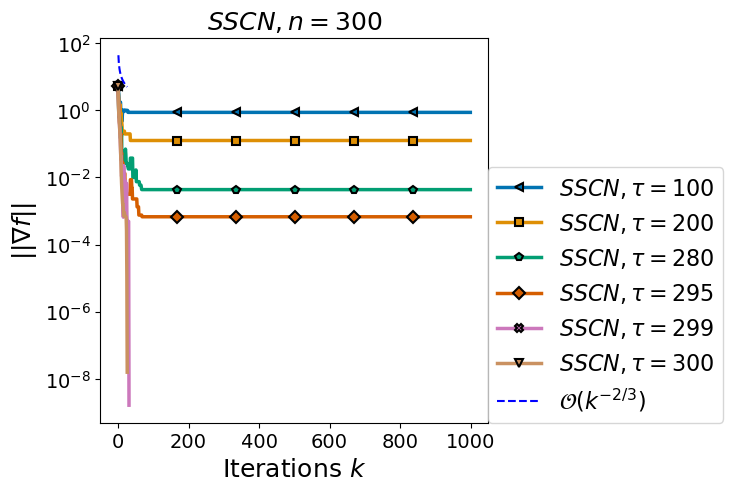

In [39]:
taus=[100,200,280,295,299,300]

plot_results(SSCN_results_const, None, [(r'$SSCN, \tau = %d$' % (tau)) 
                                                     for tau in taus 
                                                     ],
                 (r'$SSCN, n = %d$' % len(w_0)), 'Iterations $k$',figurename='w1a_square_loss_nonconvex')